In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)

In [35]:
df=pd.read_csv('train.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
features=df.columns
# Function for seperating numerical and categorical features column
def seperate(df):
    categorical_features=[]
    numerical_features=[]
    features=df.columns
    for f in features:
        if df[f].dtype=='O':
            categorical_features.append(f)
        else:
            numerical_features.append(f)

    return categorical_features,numerical_features


cf,nf=seperate(df)

In [38]:
for i in cf:
    if df[i].isnull().sum()!=0:
        print(i)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [39]:
nan_medium=df['LotFrontage'].median()
df['LotFrontage'+'_new']=df['LotFrontage'].fillna(nan_medium)

nan_medium=df['MasVnrArea'].median()
df['MasVnrArea'+'_new']=df['MasVnrArea'].fillna(nan_medium)

nan_medium=df['GarageYrBlt'].median()
df['GarageYrBlt'+'_new']=df['GarageYrBlt'].fillna(nan_medium)

<Axes: ylabel='Density'>

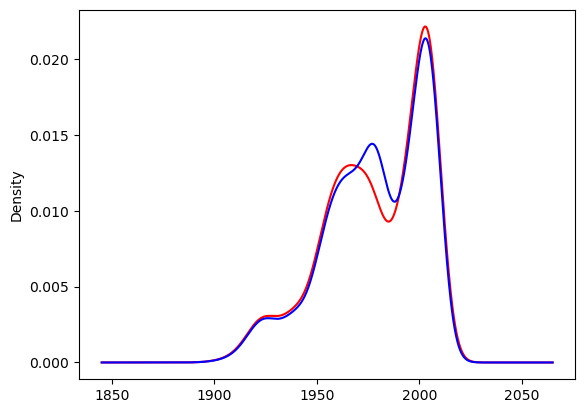

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['GarageYrBlt'].plot(kind='kde',color='red')
df['GarageYrBlt_new'].plot(kind='kde',color='blue')

<Axes: ylabel='Density'>

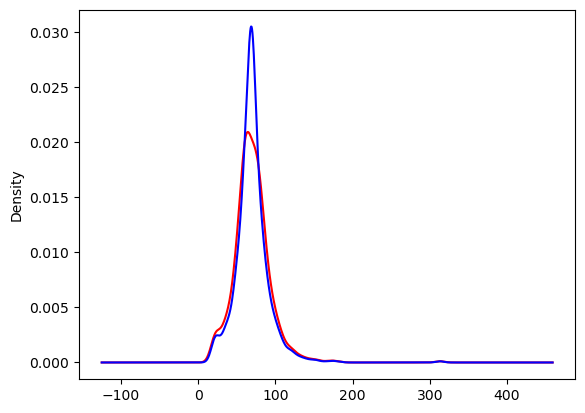

In [41]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde',color='red')
df['LotFrontage_new'].plot(kind='kde',color='blue')

<Axes: ylabel='Density'>

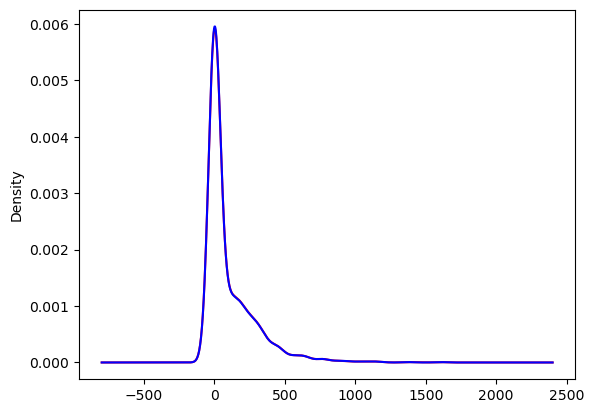

In [42]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['MasVnrArea'].plot(kind='kde',color='red')
df['MasVnrArea_new'].plot(kind='kde',color='blue')

(array([  1.,   0.,   1.,   1.,   3.,   0.,   4.,   5.,   2.,  17.,  11.,
         16.,   5.,  10.,   7.,   7.,   7.,  12.,  24.,   2.,   8.,  13.,
         32.,   9.,  31.,  49.,  38.,  32.,  37.,  39.,  62.,  35.,  27.,
         32.,  38.,  69., 106.,  11.,  18.,  17.,  40.,  22.,  40.,  38.,
         50.,  77.,  76., 118., 108.,  53.]),
 array([1900. , 1902.2, 1904.4, 1906.6, 1908.8, 1911. , 1913.2, 1915.4,
        1917.6, 1919.8, 1922. , 1924.2, 1926.4, 1928.6, 1930.8, 1933. ,
        1935.2, 1937.4, 1939.6, 1941.8, 1944. , 1946.2, 1948.4, 1950.6,
        1952.8, 1955. , 1957.2, 1959.4, 1961.6, 1963.8, 1966. , 1968.2,
        1970.4, 1972.6, 1974.8, 1977. , 1979.2, 1981.4, 1983.6, 1985.8,
        1988. , 1990.2, 1992.4, 1994.6, 1996.8, 1999. , 2001.2, 2003.4,
        2005.6, 2007.8, 2010. ]),
 <BarContainer object of 50 artists>)

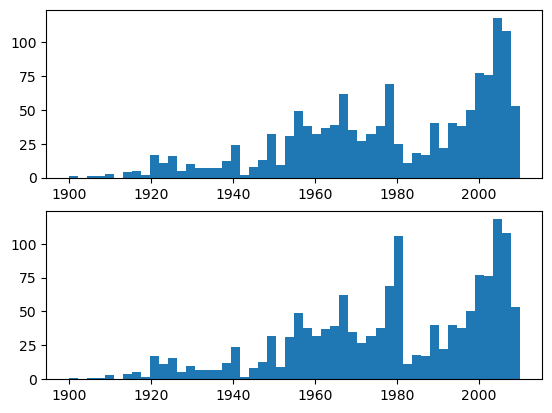

In [43]:
plt.subplot(2,1,1)
plt.hist(df['GarageYrBlt'],bins=50)
plt.subplot(2,1,2)
plt.hist(df['GarageYrBlt_new'],bins=50)

(array([889.,  31.,  57.,  62.,  46.,  64.,  45.,  39.,  35.,  36.,  33.,
         18.,   9.,  18.,  16.,   7.,   5.,   6.,   7.,   4.,   8.,   1.,
          2.,   4.,   4.,   1.,   1.,   2.,   2.,   0.,   1.,   0.,   2.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.,   32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,
         288.,  320.,  352.,  384.,  416.,  448.,  480.,  512.,  544.,
         576.,  608.,  640.,  672.,  704.,  736.,  768.,  800.,  832.,
         864.,  896.,  928.,  960.,  992., 1024., 1056., 1088., 1120.,
        1152., 1184., 1216., 1248., 1280., 1312., 1344., 1376., 1408.,
        1440., 1472., 1504., 1536., 1568., 1600.]),
 <BarContainer object of 50 artists>)

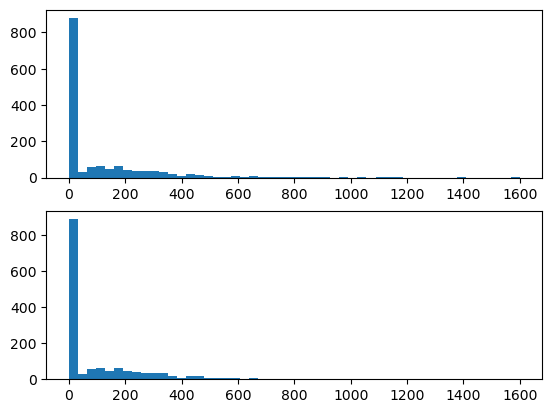

In [44]:
plt.subplot(2,1,1)
plt.hist(df['MasVnrArea'],bins=50)
plt.subplot(2,1,2)
plt.hist(df['MasVnrArea_new'],bins=50)

(array([ 42.,  11.,  32.,  44.,  76.,  67., 183., 116., 406., 130., 141.,
         60.,  39.,  35.,  23.,  12.,  13.,   6.,   6.,   3.,   3.,   2.,
          3.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 21.  ,  26.84,  32.68,  38.52,  44.36,  50.2 ,  56.04,  61.88,
         67.72,  73.56,  79.4 ,  85.24,  91.08,  96.92, 102.76, 108.6 ,
        114.44, 120.28, 126.12, 131.96, 137.8 , 143.64, 149.48, 155.32,
        161.16, 167.  , 172.84, 178.68, 184.52, 190.36, 196.2 , 202.04,
        207.88, 213.72, 219.56, 225.4 , 231.24, 237.08, 242.92, 248.76,
        254.6 , 260.44, 266.28, 272.12, 277.96, 283.8 , 289.64, 295.48,
        301.32, 307.16, 313.  ]),
 <BarContainer object of 50 artists>)

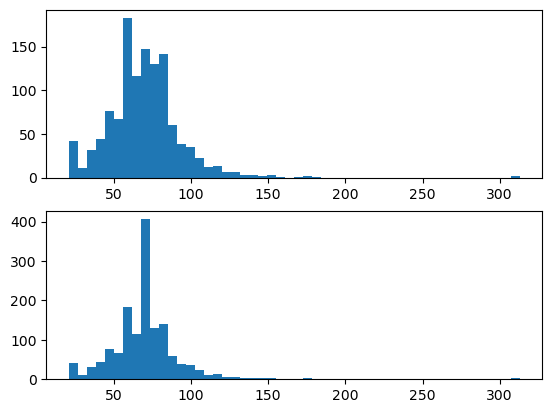

In [45]:
plt.subplot(2,1,1)
plt.hist(df['LotFrontage'],bins=50)
plt.subplot(2,1,2)
plt.hist(df['LotFrontage_new'],bins=50)

In [46]:
def randon_imputation(df,feature):
    df[feature+'random']=df[feature]
    smple=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    smple.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'random']=smple

In [47]:
randon_imputation(df,'LotFrontage')

<Axes: ylabel='Density'>

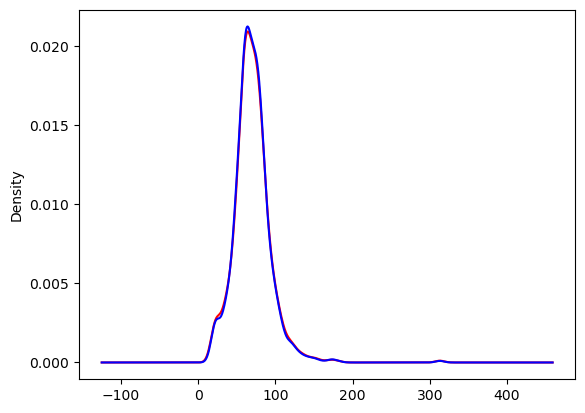

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde',color='red')
df['LotFrontagerandom'].plot(kind='kde',color='blue')

In [49]:
df['LotFrontage'].std()-df['LotFrontagerandom'].std()

0.7032132451353377

In [50]:
df=df.drop('LotFrontage_new',axis=1)
df = df.drop(['LotFrontage','GarageYrBlt','MasVnrArea'], axis=1)

In [ ]:
df

In [51]:
new_cf=[]
null_cf=[]
for i in cf:
    if df[i].isnull().sum()!=0:
        s=df[i].isnull().mean()
        s1=df[i].isnull().sum()
        if s<0.70:
            null_cf.append(i)
        elif s>0.70:
            new_cf.append(i)
            cf.remove(i)
            
        print('The mean of null values in {} is : {} and sum is {}'.format(i,s,s1))
df=df.drop(new_cf,axis=1)
df=df.drop('Fence',axis=1)
cf.remove('Fence')

The mean of null values in Alley is : 0.9376712328767123 and sum is 1369
The mean of null values in MasVnrType is : 0.5972602739726027 and sum is 872
The mean of null values in BsmtQual is : 0.025342465753424658 and sum is 37
The mean of null values in BsmtCond is : 0.025342465753424658 and sum is 37
The mean of null values in BsmtExposure is : 0.026027397260273973 and sum is 38
The mean of null values in BsmtFinType1 is : 0.025342465753424658 and sum is 37
The mean of null values in BsmtFinType2 is : 0.026027397260273973 and sum is 38
The mean of null values in Electrical is : 0.0006849315068493151 and sum is 1
The mean of null values in FireplaceQu is : 0.4726027397260274 and sum is 690
The mean of null values in GarageType is : 0.05547945205479452 and sum is 81
The mean of null values in GarageFinish is : 0.05547945205479452 and sum is 81
The mean of null values in GarageQual is : 0.05547945205479452 and sum is 81
The mean of null values in GarageCond is : 0.05547945205479452 and su

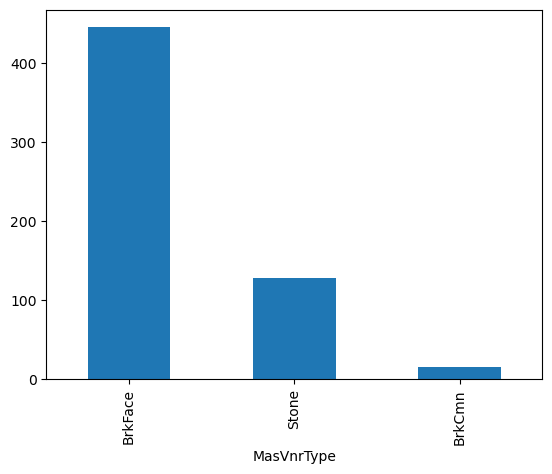

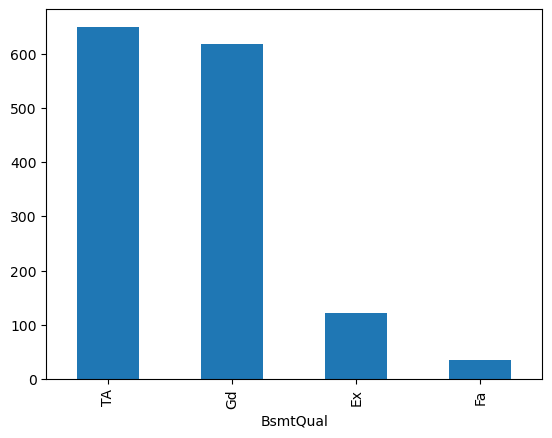

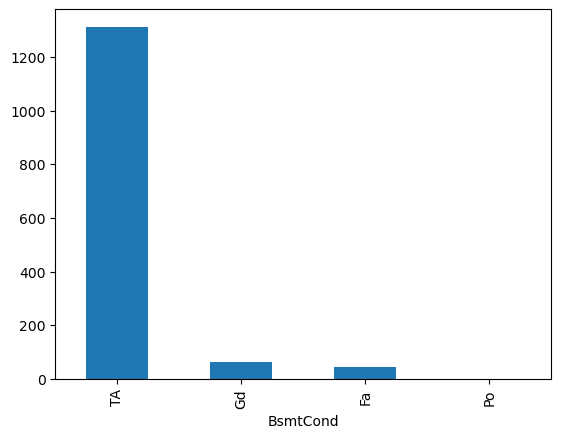

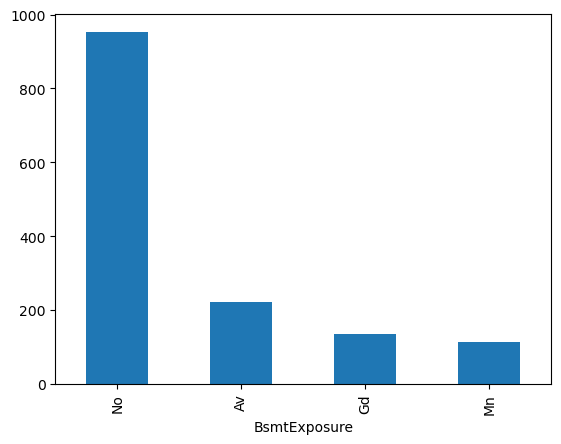

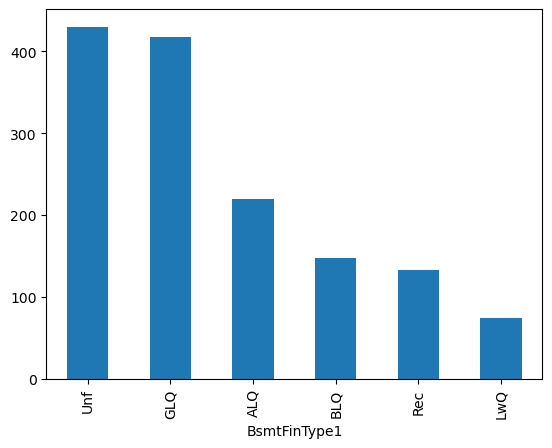

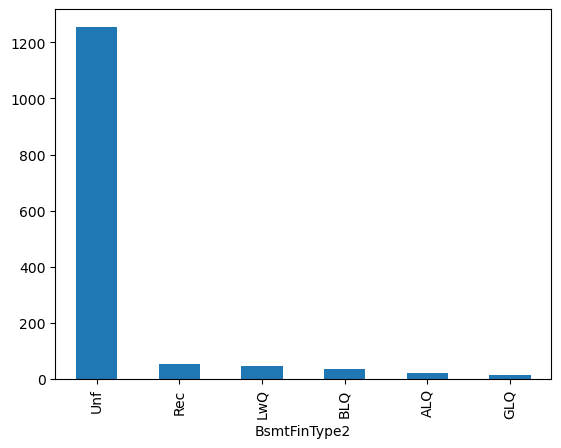

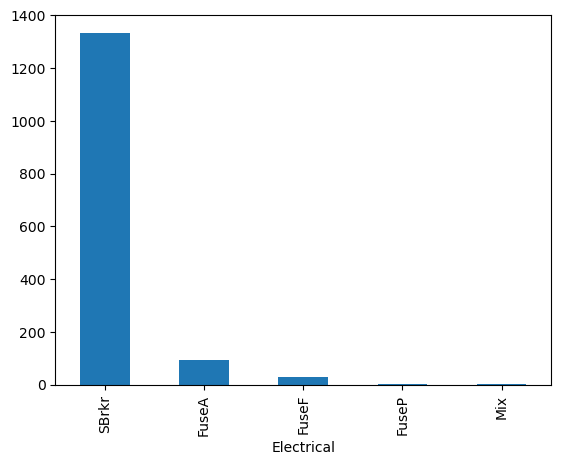

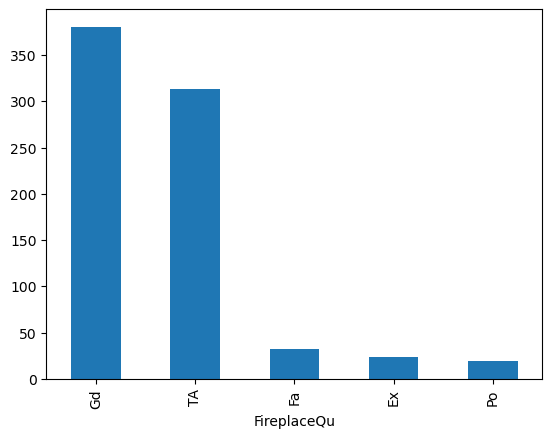

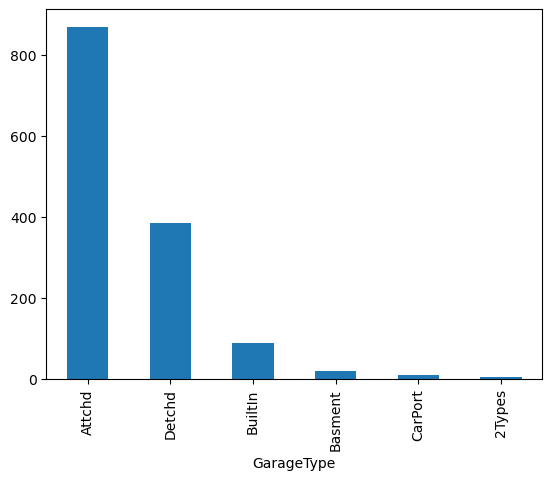

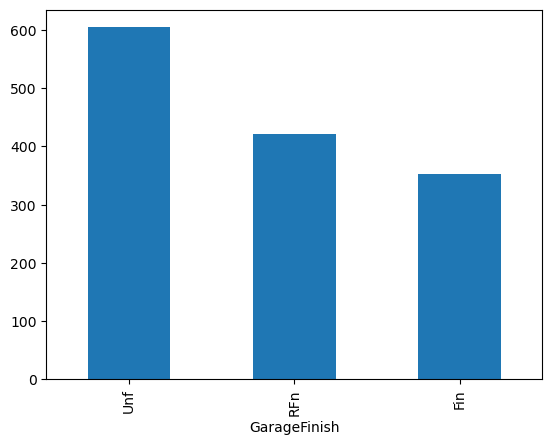

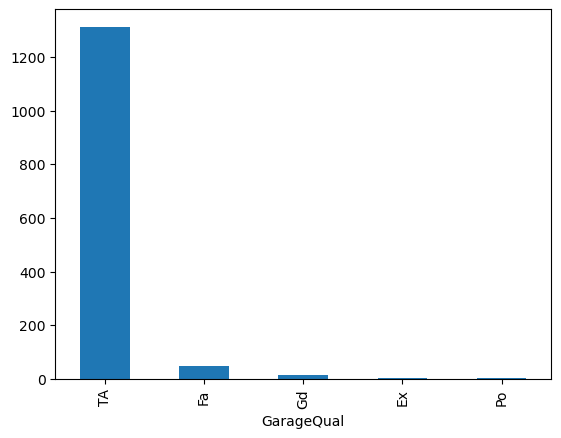

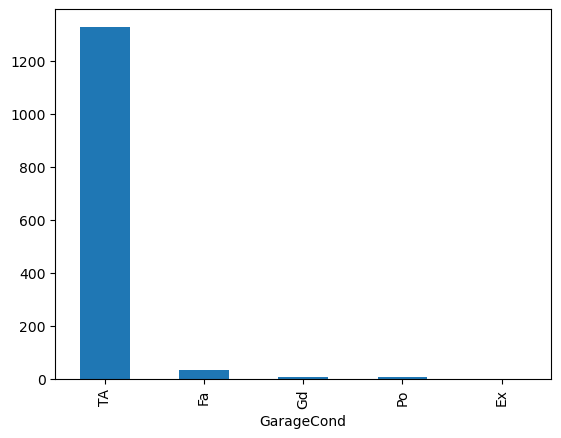

In [53]:
for i in null_cf:
    df[i].value_counts().plot(kind='bar')
    plt.show()

In [54]:
def cat_impute(df,null_cf):
    nn=[]
    nnn=[]
    for i in null_cf:
        if df[i].isnull().mean()>0.40:
            df[i]=np.where(df[i].isnull(),'Missing',df[i])
            nn.append(i)
        else:
            cc=df[i].mode()[0]
            df[i]=df[i].fillna(cc)
            nnn.append(i)
    return nn,nnn



nn,nnn=cat_impute(df,null_cf)       
        
        

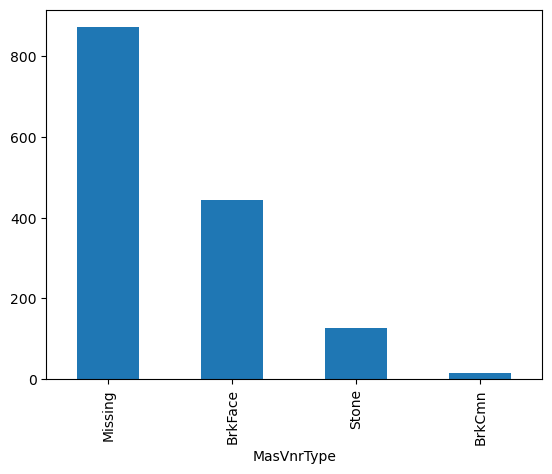

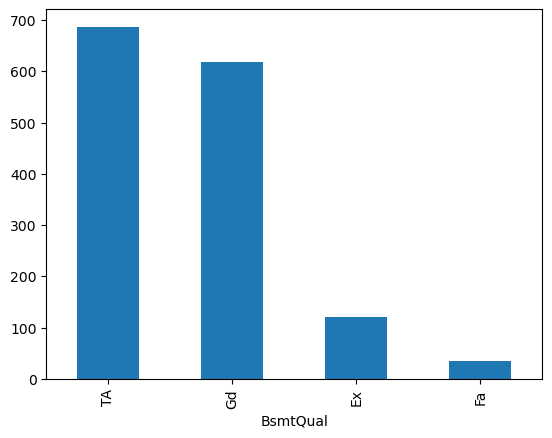

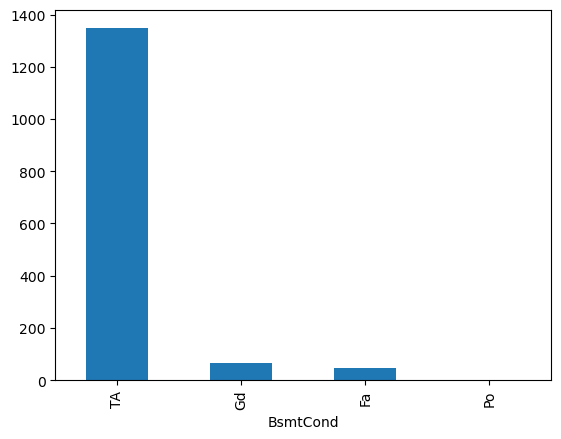

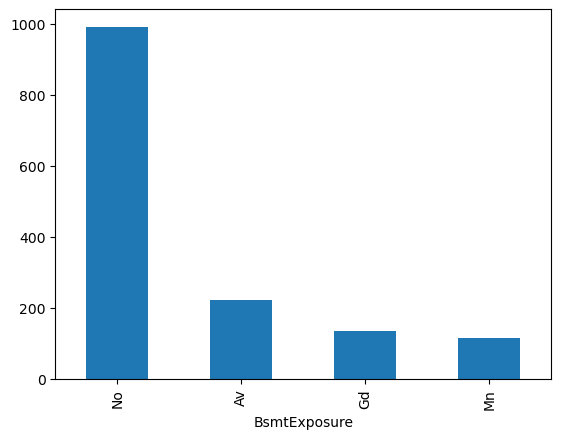

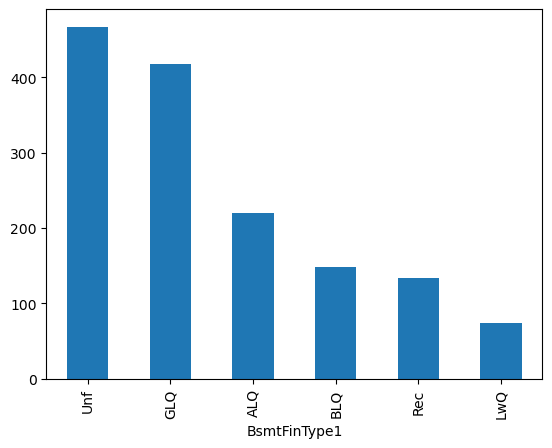

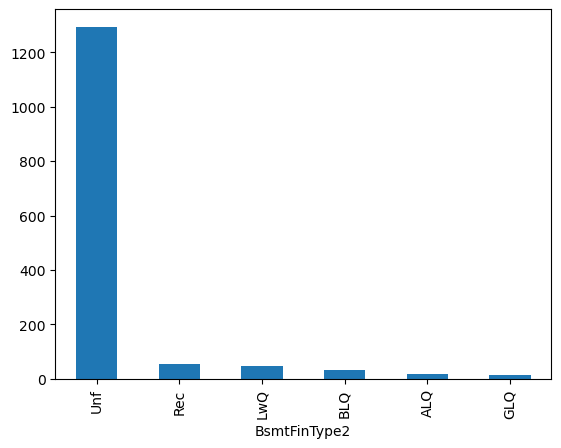

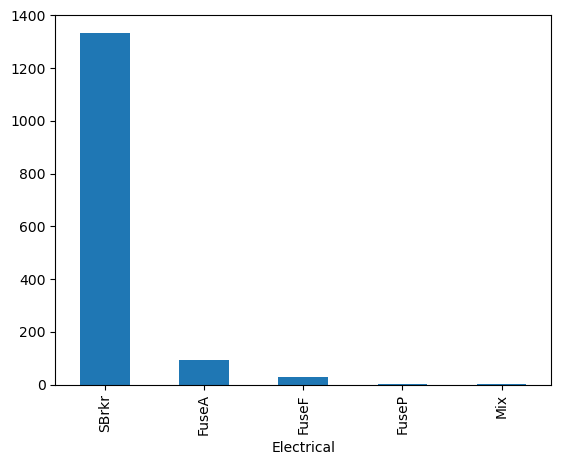

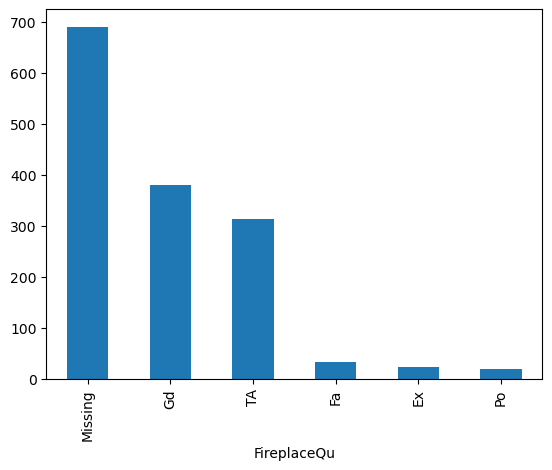

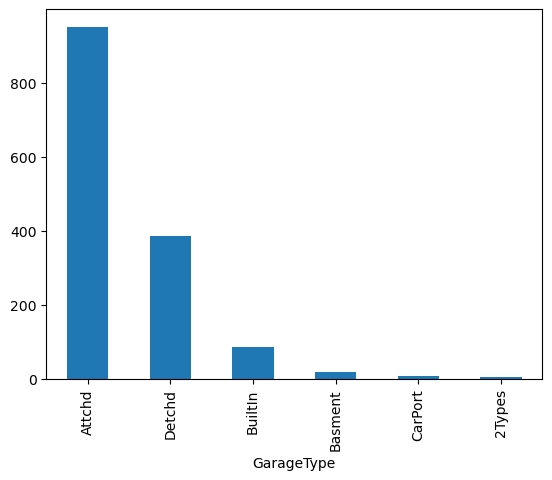

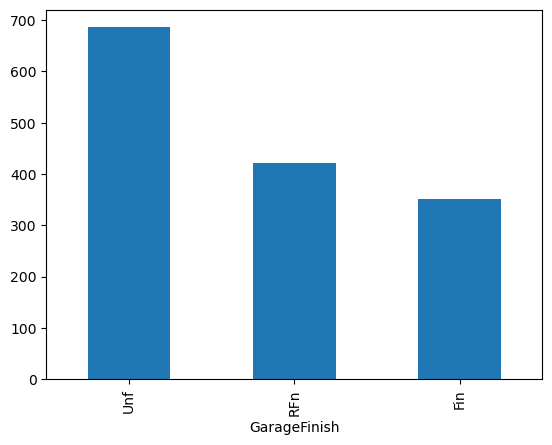

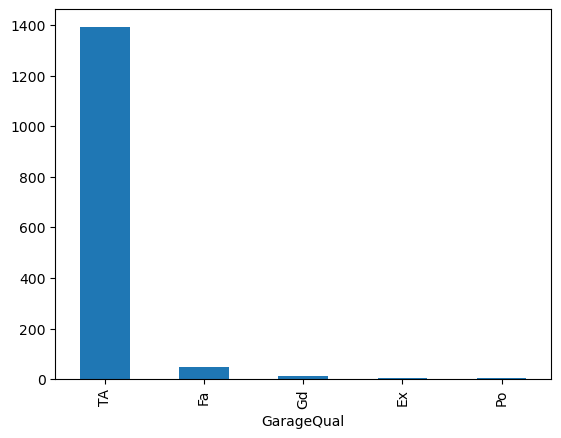

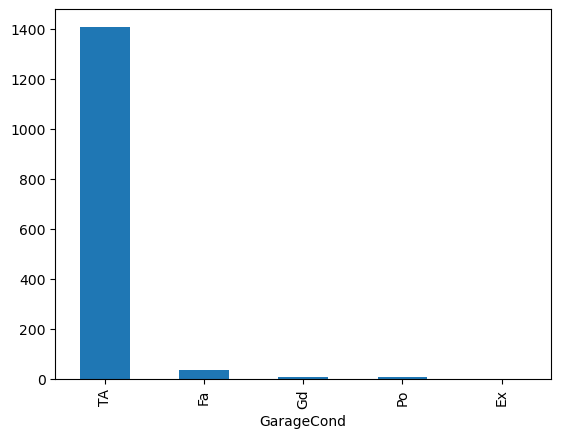

In [55]:
for i in null_cf:
    df[i].value_counts().plot(kind='bar')
    plt.show()

In [59]:
for i in cf:
    print(len(df[i].value_counts()))

5
2
4
4
2
5
3
25
9
8
5
8
6
8
15
16
4
4
5
6
4
4
4
6
6
6
5
2
5
4
7
6
6
3
5
5
3
9
6


In [60]:
for i in cf:
    c=df[i].value_counts().to_dict()
    df[i]=df[i].map(c)

<Axes: >

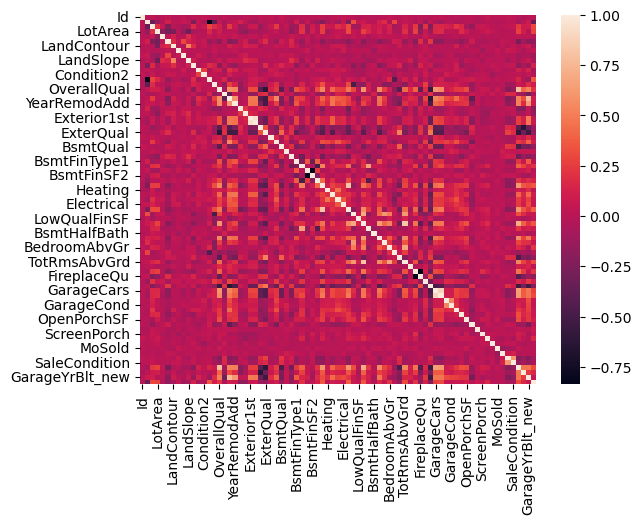

In [64]:
import seaborn as sns
sns.heatmap(df.corr())